In [1]:
# data augumentation is studied for cover cnn,because cnn is not working some features of a data.
# data augumentation is work with image size,image thickness ,rotation image brightness,contrasting images and zoom in and zoom out images.

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2
import os
import PIL
import pathlib

# Read Data

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [4]:
data_dir = tf.keras.utils.get_file("flower_photos",origin=dataset_url,untar=True,cache_dir='.')

In [5]:
data_dir

'.\\datasets\\flower_photos'

In [6]:
data_path = pathlib.Path(data_dir)

In [7]:
data_path

WindowsPath('datasets/flower_photos')

In [8]:
#  access all folders in a flower folder
data_path.glob("*/*.jpg")

<generator object Path.glob at 0x000002211BCCF450>

In [9]:
# data are access in list
list(data_path.glob("*/*.jpg"))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [10]:
# Find a length of list
len(list(data_path.glob("*/*.jpg")))

3670

In [11]:
roses = list(data_path.glob("roses/*.jpg"))
roses

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

In [12]:
roses[0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [13]:
len(roses)

641

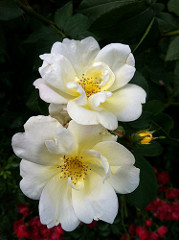

In [14]:
#  see an image using pillow library
PIL.Image.open(roses[0])

# dictionary

In [15]:
flower_names = {'roses':0,
                'daisy':1,
                'dandelion':2,
                'sunflowers':3,
                'tulips':4}

In [16]:
flower_images_dict ={'roses' : list(data_path.glob("roses/*.jpg")),
'daisy' : list(data_path.glob("daisy/*.jpg")),
'dandelion' : list(data_path.glob("dandelion/*.jpg")),
'sunflowers' : list(data_path.glob("sunflowers/*.jpg")),
'tulips' : list(data_path.glob("tulips/*.jpg"))}

In [17]:
# access a single sample
flower_images_dict['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [18]:
img = cv2.imread(str(flower_images_dict['roses'][0]))

In [19]:
img.shape

(240, 179, 3)

In [20]:
# resize the image
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [21]:
X = []
y = []

In [22]:
# function for image reading as well as resize image
for flower_name,images in flower_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized = cv2.resize(img,(180,180))
        X.append(resized)
        y.append(flower_names[flower_name])

In [23]:
X[123].shape

(180, 180, 3)

In [24]:
type(X)

list

In [25]:
type(y)

list

In [26]:
X = np.array(X)
y = np.array(y)

In [27]:
X

array([[[[  1,  16,   7],
         [  1,  16,   7],
         [  1,  17,   9],
         ...,
         [ 23,  50,  31],
         [ 25,  51,  32],
         [ 26,  52,  33]],

        [[ 10,  23,  15],
         [ 10,  23,  15],
         [  9,  22,  14],
         ...,
         [ 20,  44,  30],
         [ 23,  47,  33],
         [ 26,  50,  36]],

        [[ 13,  20,  13],
         [ 12,  20,  13],
         [ 11,  19,  12],
         ...,
         [ 21,  43,  30],
         [ 22,  45,  31],
         [ 25,  48,  34]],

        ...,

        [[ 12,  24,  18],
         [ 11,  22,  15],
         [ 12,  21,  11],
         ...,
         [  7,  14,   7],
         [  2,   8,   2],
         [  0,   2,   0]],

        [[ 19,  30,  28],
         [ 16,  26,  21],
         [ 14,  22,  15],
         ...,
         [  3,  12,   2],
         [  0,   8,   1],
         [  0,   6,   1]],

        [[ 11,  21,  20],
         [ 17,  25,  24],
         [ 21,  28,  23],
         ...,
         [  1,  12,   2],
        

In [28]:
y

array([0, 0, 0, ..., 4, 4, 4])

# Scaling

In [29]:
X = X/255
X

array([[[[0.00392157, 0.0627451 , 0.02745098],
         [0.00392157, 0.0627451 , 0.02745098],
         [0.00392157, 0.06666667, 0.03529412],
         ...,
         [0.09019608, 0.19607843, 0.12156863],
         [0.09803922, 0.2       , 0.1254902 ],
         [0.10196078, 0.20392157, 0.12941176]],

        [[0.03921569, 0.09019608, 0.05882353],
         [0.03921569, 0.09019608, 0.05882353],
         [0.03529412, 0.08627451, 0.05490196],
         ...,
         [0.07843137, 0.17254902, 0.11764706],
         [0.09019608, 0.18431373, 0.12941176],
         [0.10196078, 0.19607843, 0.14117647]],

        [[0.05098039, 0.07843137, 0.05098039],
         [0.04705882, 0.07843137, 0.05098039],
         [0.04313725, 0.0745098 , 0.04705882],
         ...,
         [0.08235294, 0.16862745, 0.11764706],
         [0.08627451, 0.17647059, 0.12156863],
         [0.09803922, 0.18823529, 0.13333333]],

        ...,

        [[0.04705882, 0.09411765, 0.07058824],
         [0.04313725, 0.08627451, 0.05882353]

# Splitting

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [32]:
X_train.shape

(2936, 180, 180, 3)

In [33]:
X_test.shape

(734, 180, 180, 3)

In [34]:
y_train.shape

(2936,)

In [35]:
y_test.shape

(734,)

In [36]:
cnn = keras.Sequential([
    keras.layers.Conv2D(16,3,padding='same',activation='relu',input_shape=(180, 180, 3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(5,activation='sigmoid')
])

In [37]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=["Accuracy"])

In [38]:
cnn.fit(X_train,y_train,epochs=2)

Epoch 1/2


92/92 [==============================] - 14s 136ms/step - loss: 1.5188 - Accuracy: 0.3362
Epoch 2/2
92/92 [==============================] - 13s 139ms/step - loss: 1.1668 - Accuracy: 0.5181


In [39]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
92/92 [==============================] - 13s 140ms/step - loss: 1.0403 - Accuracy: 0.5869
Epoch 2/10
92/92 [==============================] - 12s 134ms/step - loss: 0.9280 - Accuracy: 0.6308
Epoch 3/10
92/92 [==============================] - 12s 132ms/step - loss: 0.7603 - Accuracy: 0.7115
Epoch 4/10
92/92 [==============================] - 12s 129ms/step - loss: 0.6330 - Accuracy: 0.7595
Epoch 5/10
92/92 [==============================] - 12s 130ms/step - loss: 0.4675 - Accuracy: 0.8307
Epoch 6/10
92/92 [==============================] - 12s 135ms/step - loss: 0.2947 - Accuracy: 0.9029
Epoch 7/10
92/92 [==============================] - 13s 136ms/step - loss: 0.2011 - Accuracy: 0.9336
Epoch 8/10
92/92 [==============================] - 12s 132ms/step - loss: 0.1111 - Accuracy: 0.9670
Epoch 9/10
92/92 [==============================] - 12s 134ms/step - loss: 0.0701 - Accuracy: 0.9799
Epoch 10/10
92/92 [==============================] - 12s 128ms/step - loss: 0.0554 - Accura

In [40]:
import matplotlib.pyplot as plt

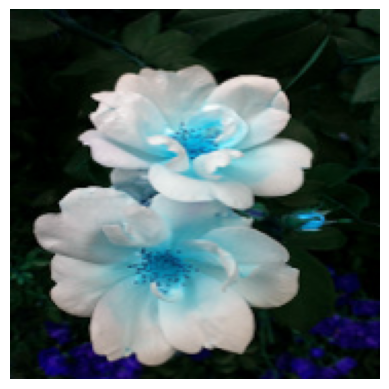

In [42]:
plt.axis("off")
plt.imshow(X[0])
plt.show()

In [43]:
data_augumentation = keras.layers.experimental.preprocessing.RandomZoom(0.5)

In [44]:
data_augumentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[0.00300955, 0.01169263, 0.00189118],
        [0.00406078, 0.01176471, 0.00392157],
        [0.00406078, 0.01174998, 0.00390684],
        ...,
        [0.01205568, 0.03922824, 0.02767958],
        [0.01145441, 0.04279649, 0.01289383],
        [0.00966224, 0.04894999, 0.00384949]],

       [[0.00443432, 0.01963838, 0.00199489],
        [0.00074497, 0.01325464, 0.00099993],
        [0.        , 0.01173417, 0.00099214],
        ...,
        [0.00700297, 0.05692802, 0.03541403],
        [0.00225486, 0.04582391, 0.00684318],
        [0.01097714, 0.05301077, 0.00595195]],

       [[0.00779788, 0.02356103, 0.00390684],
        [0.00488318, 0.02060777, 0.00099214],
        [0.        , 0.01562569, 0.        ],
        ...,
        [0.01966864, 0.08639658, 0.05101063],
        [0.00788146, 0.05878358, 0.01664628],
        [0.01194915, 0.04710408, 0.00587383]],

       ...,

       [[0.07196361, 0.02142652, 0.30068502],
        [0.09

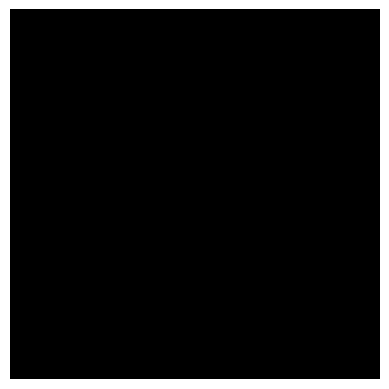

In [46]:
plt.axis("off")
plt.imshow(data_augumentation(X)[0].numpy().astype('int8'))
plt.show()